In [97]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from mpl_toolkits.mplot3d import Axes3D 
import pylab

In [98]:
source = pd.read_csv('insurance.csv')
df = source.drop(['smoker','children','sex','region'],axis=1)
df.head()


,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [99]:
x=df.values[:,:]
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.02173913, 0.3212268 , 0.25161076],
       [0.        , 0.47914985, 0.00963595],
       [0.2173913 , 0.45843422, 0.05311516],
       [0.32608696, 0.18146355, 0.33301003],
       [0.30434783, 0.34759214, 0.04381556]])

In [100]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])

for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

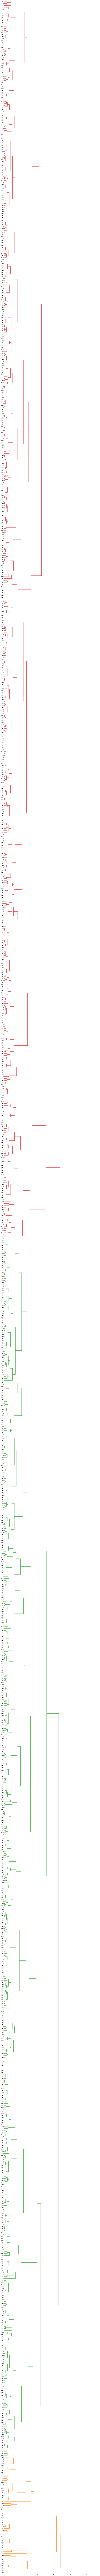

In [101]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='maxclust')
clusters

fig = pylab.figure(figsize=(18,500))
    
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [102]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print (dist_matrix)

agglom = AgglomerativeClustering(n_clusters=2,linkage='complete')
agglom.fit(feature_mtx)
agglom.labels_

[[0.         0.28976557 0.31065439 ... 0.34313822 0.24793745 0.93429835]
 [0.28976557 0.         0.22266243 ... 0.08287661 0.22416436 1.03986157]
 [0.31065439 0.22266243 0.         ... 0.24497561 0.24939359 0.82533053]
 ...
 [0.34313822 0.08287661 0.24497561 ... 0.         0.30441217 1.05378988]
 [0.24793745 0.22416436 0.24939359 ... 0.30441217 0.         0.97542978]
 [0.93429835 1.03986157 0.82533053 ... 1.05378988 0.97542978 0.        ]]


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [103]:
map_cluster = {0:'non-smoker',1:'smoker'}
source['Hierarchial_label'] = [map_cluster[x] for x in agglom.labels_]
source['eq'] = np.where(source['Hierarchial_label'] == source["smoker"],True,False)
source['Cluster']  = agglom.labels_
source

,age,sex,bmi,children,smoker,region,charges,Hierarchial_label,eq,Cluster
0,19,female,27.900,0,yes,southwest,16884.92400,non-smoker,False,0
1,18,male,33.770,1,no,southeast,1725.55230,non-smoker,False,0
2,28,male,33.000,3,no,southeast,4449.46200,non-smoker,False,0
3,33,male,22.705,0,no,northwest,21984.47061,non-smoker,False,0
4,32,male,28.880,0,no,northwest,3866.85520,non-smoker,False,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,smoker,False,1
1334,18,female,31.920,0,no,northeast,2205.98080,non-smoker,False,0
1335,18,female,36.850,0,no,southeast,1629.83350,non-smoker,False,0
1336,21,female,25.800,0,no,southwest,2007.94500,non-smoker,False,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'charges')

<Figure size 1152x1008 with 0 Axes>

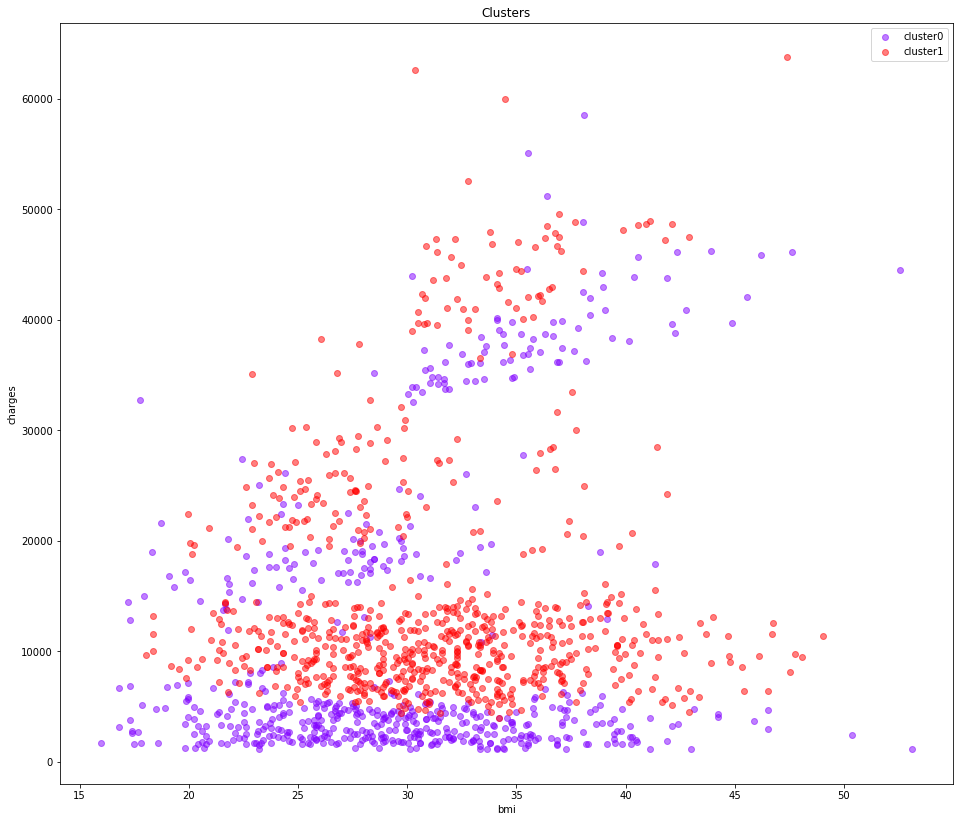

In [104]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.figure(figsize=(16,14))

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = source[source.Cluster == label]
    plt.scatter(subset.bmi, subset.charges, c=color, label='cluster'+str(label),alpha=0.5)


plt.legend()
plt.title('Clusters')
plt.xlabel('bmi')
plt.ylabel('charges')

In [105]:
x

array([[1.90000000e+01, 2.79000000e+01, 1.68849240e+04],
       [1.80000000e+01, 3.37700000e+01, 1.72555230e+03],
       [2.80000000e+01, 3.30000000e+01, 4.44946200e+03],
       ...,
       [1.80000000e+01, 3.68500000e+01, 1.62983350e+03],
       [2.10000000e+01, 2.58000000e+01, 2.00794500e+03],
       [6.10000000e+01, 2.90700000e+01, 2.91413603e+04]])

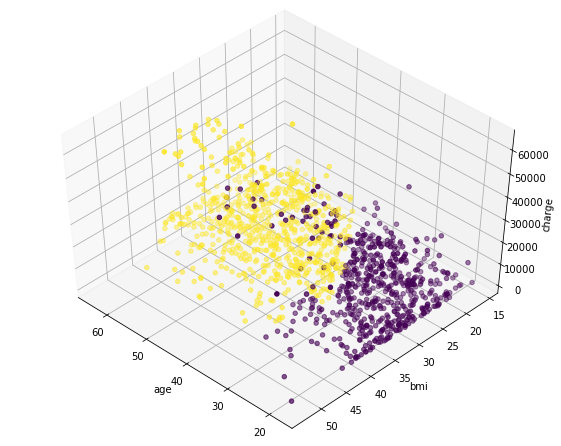

In [106]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.legend
plt.cla()
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('charge')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c= agglom.labels_.astype(np.float))